In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import tqdm
import glob
import tensorflow 
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import keras
from skimage.io import imread, imshow
from skimage.transform import resize
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.applications import ResNet50, DenseNet121,EfficientNetB1
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import Callback,ModelCheckpoint,ReduceLROnPlateau
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.losses import categorical_crossentropy
from keras.layers import GlobalAveragePooling2D, Dense

In [3]:
df = pd.read_csv("C:/Users/Nec/Documents/AQC/train.csv")

In [4]:
display(df)

,ImageId,ClassId,EncodedPixels
0,a0058b3fe.jpg,3,323915 11 324161 25 324327 2 324417 29 324581 ...
1,a0155346d.jpg,3,205754 13 205994 29 206247 32 206503 33 206759...
2,a01bc9da8.jpg,3,180432 24 180664 48 180920 47 181176 47 181431...
3,a01c8ce20.jpg,3,307537 5 307789 18 308000 3 308044 21 308070 5...
4,a0256a733.jpg,3,138753 46 139009 92 139265 92 139521 92 139777...
...,...,...,...
2710,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
2711,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
2712,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
2713,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [5]:
input_shape = (100, 100)

In [6]:
images=[]
labels=[]
for img,ClassId,EncodedPixels in tqdm(df.values):
    image=cv2.imread("C:/Users/Nec/Documents/AQC/train_images/{}".format(img),cv2.IMREAD_COLOR)
    image=cv2.resize(image,input_shape)
    images.append(image)
    labels.append(ClassId)

100%|██████████████████████████████████████████████████████████████████████████████| 2715/2715 [00:28<00:00, 96.11it/s]


3


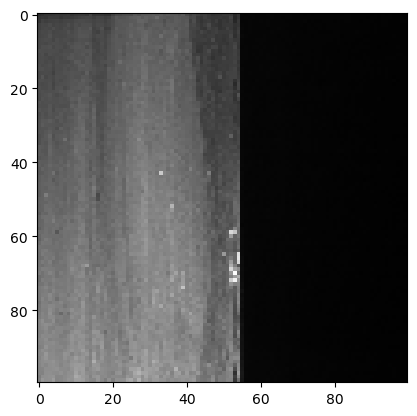

In [7]:
plt.imshow(images[-4]);
print(labels[-4])

4


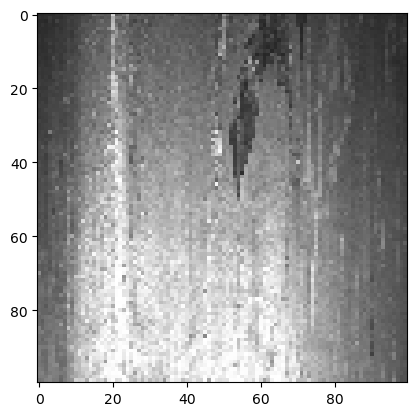

In [8]:
plt.imshow(images[15]);
print(labels[15])

3


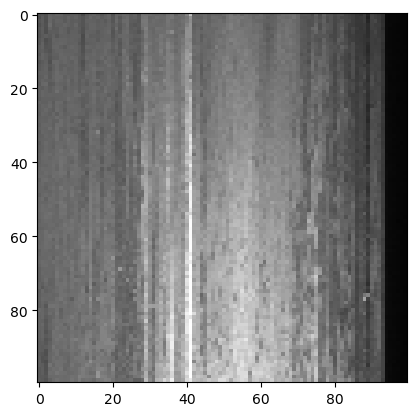

In [9]:
plt.imshow(images[92]);
print(labels[92])

2


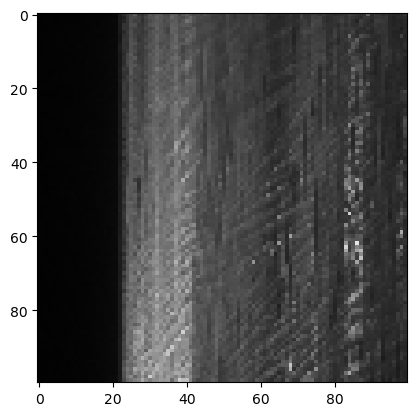

In [10]:
plt.imshow(images[253]);
print(labels[253])

In [11]:
encoded = LabelEncoder()
x=np.array(images)
x=x/255
y=encoded.fit_transform(labels)
y=to_categorical(y)

In [12]:
X_train,X_val,y_train,y_val=train_test_split(x,y,test_size=0.2,stratify=y,shuffle=True)

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy')]
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 4,verbose = 1,factor = 0.50, min_lr = 1e-10)

In [14]:
from efficientnet.tfkeras import EfficientNetB1
model1 = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
x_train = model1.output
x_train = GlobalAveragePooling2D()(x_train)
x_train = Dense(128, activation='relu')(x_train)
x_train = Dropout(0.2)(x_train)
x_train = Dense(64, activation='relu')(x_train)
x_train = Dropout(0.2)(x_train)
predictions = Dense(4, activation='softmax')(x_train)
model1 = Model(inputs=model1.input, outputs=predictions)

In [15]:
model1.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [16]:
model2 = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
x_train = model2.output
x_train = GlobalAveragePooling2D()(x_train)
x_train = Dense(128, activation='relu')(x_train)
x_train = Dropout(0.2)(x_train)
x_train = Dense(64, activation='relu')(x_train)
x_train = Dropout(0.2)(x_train)
predictions = Dense(4, activation='softmax')(x_train)
model2 = Model(inputs=model2.input, outputs=predictions)

In [17]:
model2.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [18]:
model3 = DenseNet121(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
x_train = model3.output
x_train = GlobalAveragePooling2D()(x_train)
x_train = Dense(128, activation='relu')(x_train)
x_train = Dropout(0.2)(x_train)
x_train = Dense(64, activation='relu')(x_train)
x_train = Dropout(0.2)(x_train)
predictions = Dense(4, activation='softmax')(x_train)
model3 = Model(inputs=model3.input, outputs=predictions)

In [19]:
model3.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [20]:
batch_size = 32
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
train_generator = datagen.flow(X_train,y_train, batch_size=batch_size)

In [21]:
history1 = model1.fit(train_generator,epochs=10,validation_data=(X_val,y_val), batch_size=batch_size, verbose=1, callbacks=[lrd])

Epoch 1/10
68/68 [==============================] - 95s 1s/step - loss: 0.8281 - accuracy: 0.8436 - val_loss: 1.0289 - val_accuracy: 0.8002 - lr: 0.0010
Epoch 2/10
68/68 [==============================] - 72s 1s/step - loss: 0.6595 - accuracy: 0.8635 - val_loss: 1.0826 - val_accuracy: 0.8591 - lr: 0.0010
Epoch 3/10
68/68 [==============================] - 73s 1s/step - loss: 0.5707 - accuracy: 0.8780 - val_loss: 1.4103 - val_accuracy: 0.8596 - lr: 0.0010
Epoch 4/10
68/68 [==============================] - 74s 1s/step - loss: 0.5472 - accuracy: 0.8797 - val_loss: 0.9502 - val_accuracy: 0.8614 - lr: 0.0010
Epoch 5/10
68/68 [==============================] - 76s 1s/step - loss: 0.5458 - accuracy: 0.8832 - val_loss: 0.9492 - val_accuracy: 0.8817 - lr: 0.0010
Epoch 6/10
68/68 [==============================] - 73s 1s/step - loss: 0.5205 - accuracy: 0.8880 - val_loss: 0.5702 - val_accuracy: 0.8803 - lr: 0.0010
Epoch 7/10
68/68 [==============================] - 71s 1s/step - loss: 0.5130 - a

In [33]:
history2 = model2.fit(train_generator,epochs=10,validation_data=(X_val,y_val), batch_size=batch_size, verbose=1, callbacks=[lrd])

Epoch 1/10
68/68 [==============================] - 139s 2s/step - loss: 1.0216 - accuracy: 0.8432 - val_loss: 1.5011 - val_accuracy: 0.8573 - lr: 0.0010
Epoch 2/10
68/68 [==============================] - 136s 2s/step - loss: 0.8449 - accuracy: 0.8507 - val_loss: 44.6795 - val_accuracy: 0.8573 - lr: 0.0010
Epoch 3/10
68/68 [==============================] - 133s 2s/step - loss: 0.7643 - accuracy: 0.8523 - val_loss: 1.1862 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/10
68/68 [==============================] - 134s 2s/step - loss: 0.7175 - accuracy: 0.8590 - val_loss: 1.0093 - val_accuracy: 0.8011 - lr: 0.0010
Epoch 5/10
68/68 [==============================] - 129s 2s/step - loss: 0.6819 - accuracy: 0.8711 - val_loss: 2.1655 - val_accuracy: 0.8573 - lr: 0.0010
Epoch 6/10
68/68 [==============================] - 142s 2s/step - loss: 0.7075 - accuracy: 0.8621 - val_loss: 1.6539 - val_accuracy: 0.8573 - lr: 0.0010
Epoch 7/10
68/68 [==============================] - 151s 2s/step - loss: 0.

In [34]:
history3 = model3.fit(train_generator,epochs=10,validation_data=(X_val,y_val), batch_size=batch_size, verbose=1, callbacks=[lrd])

Epoch 1/10
68/68 [==============================] - 135s 2s/step - loss: 0.9435 - accuracy: 0.8423 - val_loss: 0.8655 - val_accuracy: 0.8582 - lr: 0.0010
Epoch 2/10
68/68 [==============================] - 110s 2s/step - loss: 0.7618 - accuracy: 0.8531 - val_loss: 2.0326 - val_accuracy: 0.7182 - lr: 0.0010
Epoch 3/10
68/68 [==============================] - 114s 2s/step - loss: 0.7146 - accuracy: 0.8566 - val_loss: 1.0478 - val_accuracy: 0.7910 - lr: 0.0010
Epoch 4/10
68/68 [==============================] - 114s 2s/step - loss: 0.6958 - accuracy: 0.8604 - val_loss: 0.9303 - val_accuracy: 0.8430 - lr: 0.0010
Epoch 5/10
68/68 [==============================] - 113s 2s/step - loss: 0.6808 - accuracy: 0.8656 - val_loss: 0.8203 - val_accuracy: 0.8504 - lr: 0.0010
Epoch 6/10
68/68 [==============================] - 114s 2s/step - loss: 0.6376 - accuracy: 0.8687 - val_loss: 1.2140 - val_accuracy: 0.8448 - lr: 0.0010
Epoch 7/10
68/68 [==============================] - 116s 2s/step - loss: 0.5

In [35]:
from keras.layers import Input, Average

models=[model1,model2,model3]
model_input = Input(shape=(100, 100, 3))
model_outputs = [model(model_input) for model in models]
combined_output = Average()(model_outputs)
combined_model = Model(inputs=model_input, outputs=combined_output, name='final')

In [36]:
combined_model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=METRICS)

In [37]:
history = combined_model.fit(train_generator,epochs=5,validation_data=(X_val,y_val), batch_size=16, verbose=1, callbacks=[lrd])

Epoch 1/5
68/68 [==============================] - 393s 5s/step - loss: 0.5697 - accuracy: 0.8738 - val_loss: 1.2992 - val_accuracy: 0.8651 - lr: 0.0010
Epoch 2/5
68/68 [==============================] - 330s 5s/step - loss: 0.5909 - accuracy: 0.8711 - val_loss: 1.5371 - val_accuracy: 0.8573 - lr: 0.0010
Epoch 3/5
68/68 [==============================] - 314s 5s/step - loss: 0.6190 - accuracy: 0.8686 - val_loss: 1.5244 - val_accuracy: 0.8582 - lr: 0.0010
Epoch 4/5
68/68 [==============================] - 324s 5s/step - loss: 0.5936 - accuracy: 0.8728 - val_loss: 1.5474 - val_accuracy: 0.8683 - lr: 0.0010
Epoch 5/5
68/68 [==============================] - 323s 5s/step - loss: 0.6181 - accuracy: 0.8725 - val_loss: 0.9185 - val_accuracy: 0.8481 - lr: 0.0010


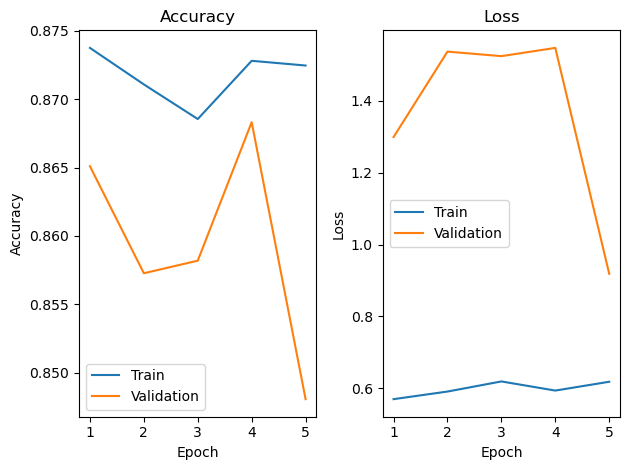

In [38]:
def plot_training_history(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
   
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
    plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    

    plt.tight_layout()
    plt.show()
plot_training_history(history)

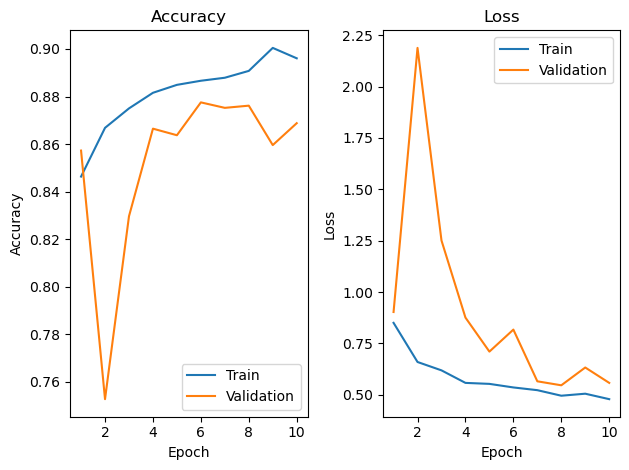

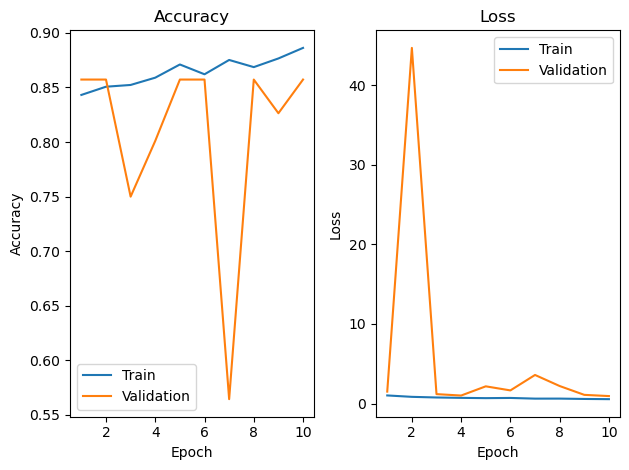

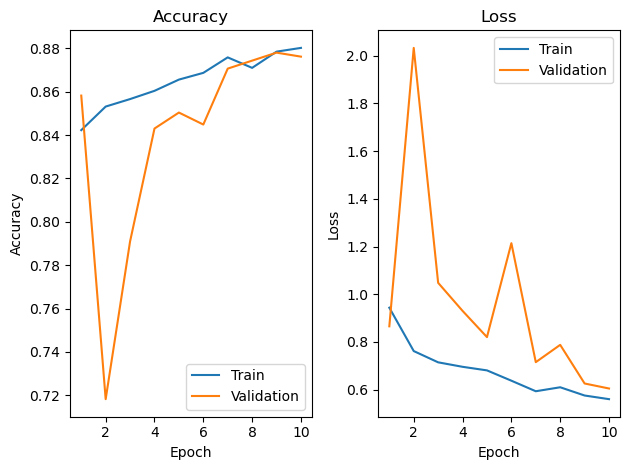

In [39]:
plot_training_history(history1)
plot_training_history(history2)
plot_training_history(history3)

In [40]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [41]:
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable


In [42]:
!pip install helper

Defaulting to user installation because normal site-packages is not writeable


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as pty
from PIL import Image
import torch
from torchvision import datasets, transforms
import cv2
import seaborn as sns
import os
from pathlib import Path
from collections import defaultdict

In [44]:
TRAIN_IMG_PATH = "C:/Users/Nec/Documents/AQC/train_images/"
TEST_IMG_PATH = "C:/Users/Nec/Documents/AQC/test_images/"
TRAIN_DF_PATH = "C:/Users/Nec/Documents/AQC/train.csv"

In [45]:
print("Total number of training images: ")
print(len([entry for entry in os.listdir(TRAIN_IMG_PATH) if os.path.isfile(os.path.join(TRAIN_IMG_PATH, entry))]))

Total number of training images: 
4718


In [46]:
print("Total number of testing images: ")
print(len([entry for entry in os.listdir(TEST_IMG_PATH) if os.path.isfile(os.path.join(TEST_IMG_PATH, entry))]))

Total number of testing images: 
2073


In [47]:
train_df = pd.read_csv(TRAIN_DF_PATH)

In [48]:
train_df.head()

,ImageId,ClassId,EncodedPixels
0,a0058b3fe.jpg,3,323915 11 324161 25 324327 2 324417 29 324581 ...
1,a0155346d.jpg,3,205754 13 205994 29 206247 32 206503 33 206759...
2,a01bc9da8.jpg,3,180432 24 180664 48 180920 47 181176 47 181431...
3,a01c8ce20.jpg,3,307537 5 307789 18 308000 3 308044 21 308070 5...
4,a0256a733.jpg,3,138753 46 139009 92 139265 92 139521 92 139777...


In [49]:
train_df.shape

(2715, 3)

In [50]:
train_df.describe()

,ClassId
count,2715.000000
mean,2.823573
std,0.798970
min,1.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,4.000000


In [51]:
def without_hue(ax, feature):
    total = float(sum(feature))
    for p in ax.patches:
        print(p.get_height)
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), size = 12, ha='center')

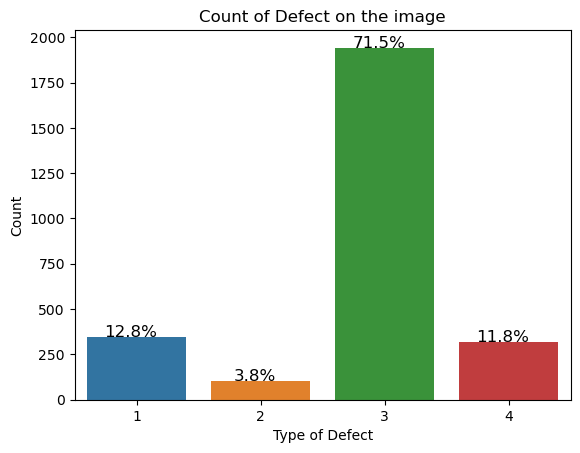

In [52]:
def_img_df = train_df.groupby(["ClassId"])['ImageId'].count().reset_index()
ax = sns.barplot(data=def_img_df, x="ClassId", y="ImageId")
#ax.bar_label(ax.containers[0])
total = float(sum(def_img_df.ImageId))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), size = 12, ha='center')
ax.set(xlabel='Type of Defect', ylabel='Count', title = "Count of Defect on the image")
plt.show()

In [53]:
file_names = []
for root, dirs, files in os.walk(TRAIN_IMG_PATH):
    for file in files:
        file_names.append(os.path.join(root, file))

In [54]:
img_name_df = pd.DataFrame(file_names, columns = ["img_name"])
img_name_df.head()

,img_name
0,C:/Users/Nec/Documents/AQC/train_images/a0058b...
1,C:/Users/Nec/Documents/AQC/train_images/a008ff...
2,C:/Users/Nec/Documents/AQC/train_images/a00e32...
3,C:/Users/Nec/Documents/AQC/train_images/a013f4...
4,C:/Users/Nec/Documents/AQC/train_images/a01553...


In [55]:
img_name_df['Image_Id'] = img_name_df['img_name'].str[-13:]

In [56]:
img_name_df

,img_name,Image_Id
0,C:/Users/Nec/Documents/AQC/train_images/a0058b...,a0058b3fe.jpg
1,C:/Users/Nec/Documents/AQC/train_images/a008ff...,a008ffb41.jpg
2,C:/Users/Nec/Documents/AQC/train_images/a00e32...,a00e32c0a.jpg
3,C:/Users/Nec/Documents/AQC/train_images/a013f4...,a013f42d6.jpg
4,C:/Users/Nec/Documents/AQC/train_images/a01553...,a0155346d.jpg
...,...,...
4713,C:/Users/Nec/Documents/AQC/train_images/fff029...,fff0295e1.jpg
4714,C:/Users/Nec/Documents/AQC/train_images/fff02e...,fff02e9c5.jpg
4715,C:/Users/Nec/Documents/AQC/train_images/fffe98...,fffe98443.jpg
4716,C:/Users/Nec/Documents/AQC/train_images/ffff4e...,ffff4eaa8.jpg


In [58]:
defect_dict = {}

for i in range(4718):
    img_name_df.iloc[i][1]
    defect_value = train_df[train_df.ImageId == img_name_df.iloc[i][1]].shape[0]
    defect_dict.setdefault(defect_value, 0)
    defect_dict[defect_value] += 1

In [59]:
defect_dict

{1: 2343, 0: 2190, 2: 183, 3: 2}

In [60]:
defect_df = pd.DataFrame(list(defect_dict.items()), columns=['defect_no','count'])

In [61]:
defect_df

,defect_no,count
0,1,2343
1,0,2190
2,2,183
3,3,2


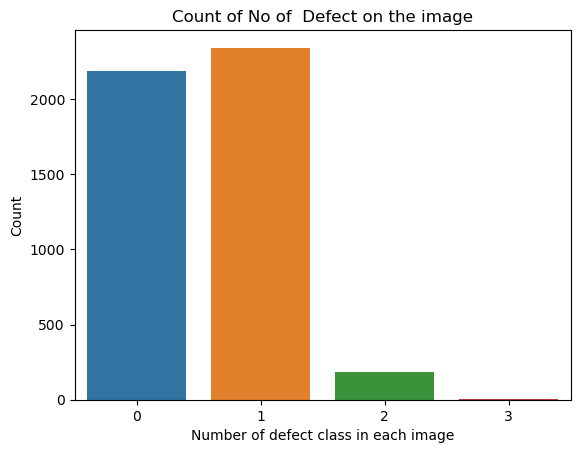

In [62]:
ax = sns.barplot(data=defect_df, x="defect_no", y="count")
ax.set(xlabel='Number of defect class in each image', ylabel='Count', title = "Count of No of  Defect on the image")
plt.show()

In [23]:
from efficientnet.tfkeras import EfficientNetB4
model_json = model1.to_json()
with open("combined_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save("Final_AQC.h5")

In [116]:
image_list = os.listdir('C:/Users/Nec/Documents/AQC/test_images')

In [130]:
predicted_classes = []

for image_name in image_list:
    image_path = os.path.join('C:/Users/Nec/Documents/AQC/test_images', image_name)
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(100, 100))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = tf.keras.applications.resnet50.preprocess_input(image)
    predictions = model1.predict(image)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_classes.append(predicted_class)

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


In [131]:
submission=pd.DataFrame()

In [132]:
values=np.array(predicted_classes)

In [133]:
submission['ImageId']=image_list
submission['ClassId']=values

In [134]:
display(submission)

,ImageId,ClassId
0,a003578d4.jpg,2
1,a016a1b45.jpg,2
2,a016ebfca.jpg,2
3,a027b3720.jpg,2
4,a02a1e995.jpg,2
...,...,...
2068,ffc9a6187.jpg,2
2069,ffdb60677.jpg,2
2070,ffe6e2da6.jpg,2
2071,fff4fd9bb.jpg,2


In [135]:
submission.shape

(2073, 2)

In [136]:
submission.describe()

,ClassId
count,2073.000000
mean,1.991317
std,0.131526
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


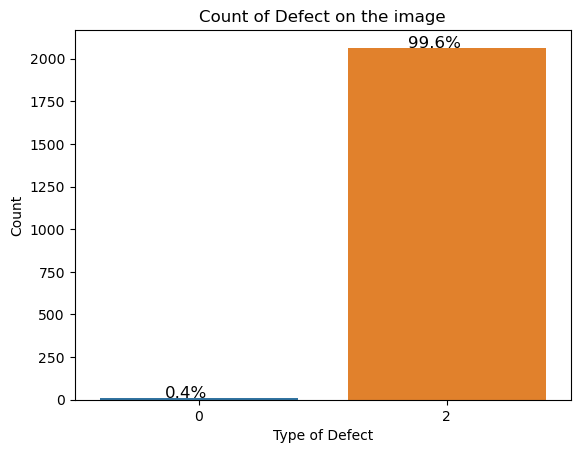

In [137]:
def_image_df = submission.groupby(["ClassId"])['ImageId'].count().reset_index()
ax = sns.barplot(data=def_image_df, x="ClassId", y="ImageId")
#ax.bar_label(ax.containers[0])
total = float(sum(def_image_df.ImageId))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), size = 12, ha='center')
ax.set(xlabel='Type of Defect', ylabel='Count', title = "Count of Defect on the image")
plt.show()